In [2]:
import  numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,ZeroPadding2D,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist


In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [4]:
x_train,y_train=load_mnist('Compressed', kind='train')
x_test,y_test=load_mnist('Compressed', kind='t10k')

In [5]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784), dtype=uint8)

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

In [7]:
np.shape(x_train)

(60000, 784)

In [8]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)

In [9]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)


In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_train=np.expand_dims(x_train,axis=3)
x_test=np.expand_dims(x_test,axis=3)


In [12]:
x_train.shape

(60000, 28, 28, 1, 1)

In [13]:
x_train=x_train/255.0
x_test=x_test/255.0

In [31]:
model=Sequential([
    ZeroPadding2D(padding=(1,1),input_shape=(28,28,1)),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    Dropout(0.2),
    MaxPool2D(pool_size=(2,2),strides=(2, 2)),
    ZeroPadding2D(padding=(1,1)),
     Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(10,activation="softmax"),
])

In [32]:
model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [33]:
y_train_o=to_categorical(y_train)
y_test_o=to_categorical(y_test)

In [34]:
history=model.fit(x_train,y_train_o,epochs=10,batch_size=300,validation_data=(x_test,y_test_o))


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7636 - loss: 0.6672 - val_accuracy: 0.8554 - val_loss: 0.4405
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.8509 - loss: 0.4160 - val_accuracy: 0.8729 - val_loss: 0.3648
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.8702 - loss: 0.3654 - val_accuracy: 0.8818 - val_loss: 0.3439
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.8799 - loss: 0.3319 - val_accuracy: 0.8896 - val_loss: 0.3189
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8868 - loss: 0.3135 - val_accuracy: 0.8929 - val_loss: 0.3020
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8933 - loss: 0.2950 - val_accuracy: 0.8991 - val_loss: 0.2862
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.8981 - loss: 0.2808 - val_accuracy: 0.8992 - val_loss: 0.2761
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9021 - loss: 0.2703 - val_acc

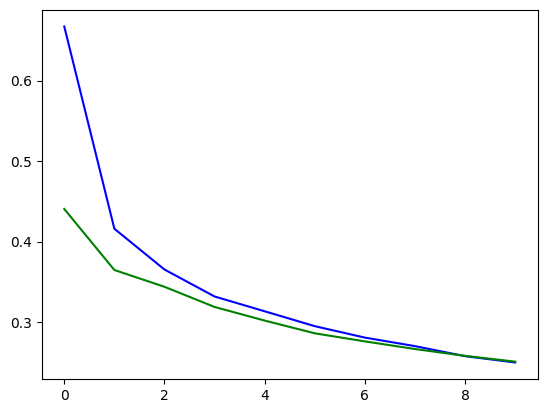

In [35]:
import  matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='blue',label="train data")
plt.plot(history.history['val_loss'],color='green',label="validation data")

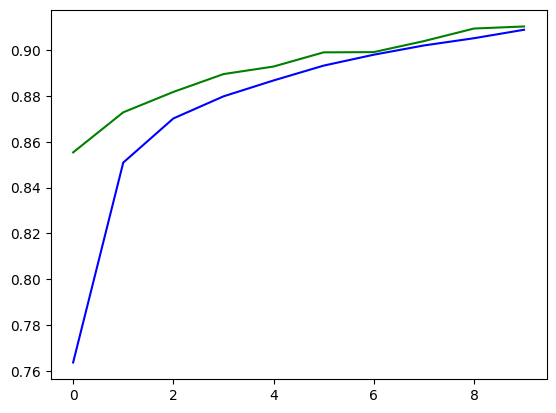

In [36]:
plt.plot(history.history['accuracy'], color='blue', label="train data")
plt.plot(history.history['val_accuracy'], color='green', label="validation data")

In [38]:
model.save('fashion2.keras')